In [15]:
import sagemaker
import boto3
from sagemaker.session import s3_input, Session

In [16]:
bucket_name = 'supraja-arima-appledataset' 
my_region = boto3.session.Session().region_name # set the region of the instance
print(my_region)

us-east-1


In [17]:
s3 = boto3.resource('s3')
try:
    if  my_region == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)

S3 bucket created successfully


In [18]:
# set an output path where the trained model will be saved
prefix = 'arima-apple-as-a-built-in-algo'
output_path ='s3://{}/{}/output'.format(bucket_name, prefix)
print(output_path)

s3://supraja-arima-appledataset/arima-apple-as-a-built-in-algo/output


In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
symbol = ["AAPL"]
start_date = "2007-01-02"
features = yf.download(symbol, start=start_date)

[*********************100%***********************]  1 of 1 completed


In [21]:
# Drop multiple columns
features = features.drop(['Open', 'High','Low', 'Adj Close','Volume'], axis=1)

In [22]:
features = features.dropna(axis=0)
features.isna().sum()

Close    0
dtype: int64

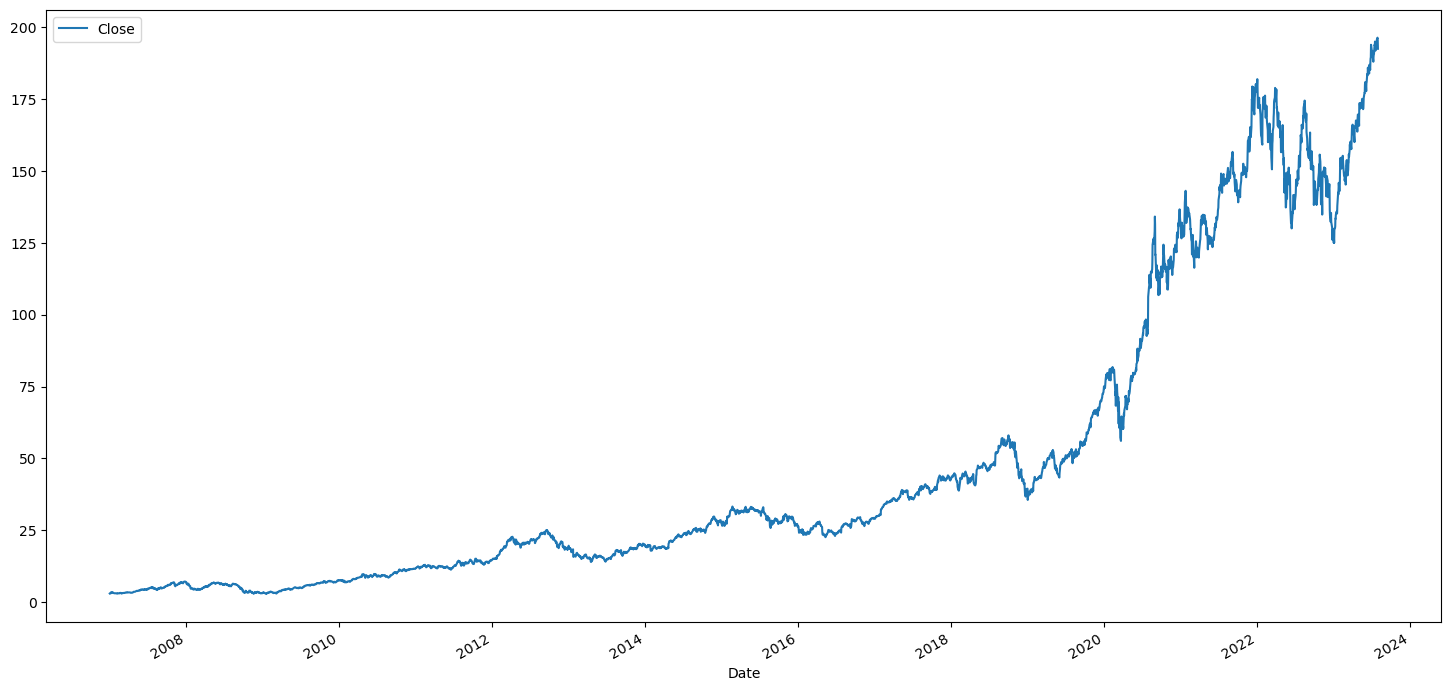

In [23]:
df_plot = pd.DataFrame(features, index=features.index)
# Plot the DataFrame
df_plot.plot(figsize=(18,9))
plt.show()

In [24]:
features.shape

(4174, 1)

In [25]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
df = features 
df.shape

(4174, 1)

In [27]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = "AIC")
  print("1. ADF : " , dftest[0])
  print("2. P-value :" , dftest[1])
  print("3. Num of Lags :" , dftest[2])
  print("4. Num of Observations Used For ADF Regressor and Critical Value Calculations  :" , dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
    print("\t", key,": ", val)

In [28]:
ad_test(df["Close"])

1. ADF :  1.7270848931452778
2. P-value : 0.9981928869389562
3. Num of Lags : 26
4. Num of Observations Used For ADF Regressor and Critical Value Calculations  : 4147
5. Critical Values :
	 1% :  -3.431927852028984
	 5% :  -2.862237208417471
	 10% :  -2.5671411303007297


In [29]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [30]:
stepwise_fit = auto_arima(df["Close"], trace=True, suppress_warnings = True, stepwise=False, seasonal=False)
stepwise_fit.summary()

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=17159.343, Time=0.76 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.28 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.45 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.86 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=inf, Time=9.45 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=15908.244, Time=0.27 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.79 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.42 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.95 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.63 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=15391.098, Time=0.97 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.70 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.96 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.67 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=15086.261, Time=0.78 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4174
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -7351.638
Date:                Thu, 03 Aug 2023   AIC                          14717.276
Time:                        04:34:00   BIC                          14761.629
Sample:                             0   HQIC                         14732.964
                               - 4174                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.022     -0.027      0.979      -0.044       0.043
ar.L1         -0.8810      0.007   -128.405      0.000      -0.894      -0.868
ar.L2         -0.7281      0.009    -81.726      0.000      -0.746      -0.711
ar.L3         -0.5635      0.009    -62.187      0.000      -0.581      -0.546
ar.L4         -0.3822      0.008    -45.073      0.000      -0.399      -0.366
ar.L5         -0.1566      0.007    -21.845      0.000      -0.171      -0.143
sigma2         1.9860      0.015    132.032      0.000       1.956       2.015
===================================================================================
Ljung-Box (L1) (Q):                   3.37   Jarque-Bera (JB):             44164.94
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):             142.15   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(4174, 1)
(4144, 1) (30, 1)


In [33]:
import os
train_csv = train.to_csv('apple-arima-train.csv')
test_csv = test.to_csv('apple-arima-test.csv')

In [34]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/apple-arima-train.csv')).upload_file('apple-arima-train.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [35]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'test/apple-arima-test.csv')).upload_file('apple-arima-test.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [36]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train["Close"], order=(4,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4144
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -6949.590
Date:                Thu, 03 Aug 2023   AIC                          13911.181
Time:                        04:34:03   BIC                          13949.156
Sample:                             0   HQIC                         13924.618
                               - 4144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9319      0.022    -42.097      0.000      -0.975      -0.888
ar.L2         -0.0785      0.009     -8.318      0.000      -0.097      -0.060
ar.L3         -0.0570      0.010     -5.873      0.000      -0.076      -0.038
ar.L4         -0.0613      0.008     -7.624      0.000      -0.077      -0.046
ma.L1          0.8855      0.022     40.700      0.000       0.843       0.928
sigma2         1.6769      0.013    126.799      0.000       1.651       1.703
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             37060.08
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             137.49   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ='levels')
pred.index = df.index[start:end+1]
print(pred)

Date
2023-06-21    184.784091
2023-06-22    184.923287
2023-06-23    184.873037
2023-06-26    184.916295
2023-06-27    184.885853
2023-06-28    184.905152
2023-06-29    184.890173
2023-06-30    184.901698
2023-07-03    184.892901
2023-07-05    184.899864
2023-07-06    184.894328
2023-07-07    184.898735
2023-07-10    184.895205
2023-07-11    184.898037
2023-07-12    184.895764
2023-07-13    184.897591
2023-07-14    184.896122
2023-07-17    184.897303
2023-07-18    184.896353
2023-07-19    184.897118
2023-07-20    184.896502
2023-07-21    184.896997
2023-07-24    184.896599
2023-07-25    184.896919
2023-07-26    184.896662
2023-07-27    184.896869
2023-07-28    184.896702
2023-07-31    184.896836
2023-08-01    184.896728
2023-08-02    184.896815
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

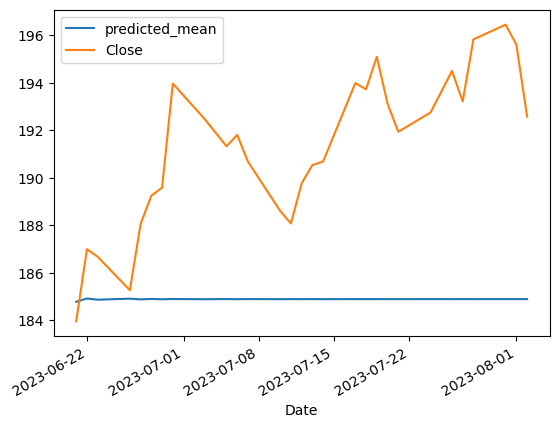

In [38]:
pred.plot(legend=True)
test["Close"].plot(legend=True)

In [39]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test["Close"]))
print(rmse)

7.171452143797489


In [40]:
test["Close"].mean()

191.34000040690105

In [41]:
model2 = sm.tsa.arima.ARIMA(train["Close"], order=(4,1,1))
model2 = model2.fit()

In [42]:
future_index=pd.date_range(start="2023-05-04", end = "2023-06-02")
pred = model2.predict(start = len(df),end=len(df)+29,typ='levels').rename('ARIMA Prdictions')
pred.index = future_index

In [43]:
pred

2023-05-04    184.896745
2023-05-05    184.896802
2023-05-06    184.896756
2023-05-07    184.896793
2023-05-08    184.896764
2023-05-09    184.896787
2023-05-10    184.896768
2023-05-11    184.896783
2023-05-12    184.896771
2023-05-13    184.896781
2023-05-14    184.896773
2023-05-15    184.896779
2023-05-16    184.896774
2023-05-17    184.896778
2023-05-18    184.896775
2023-05-19    184.896778
2023-05-20    184.896776
2023-05-21    184.896777
2023-05-22    184.896776
2023-05-23    184.896777
2023-05-24    184.896776
2023-05-25    184.896777
2023-05-26    184.896776
2023-05-27    184.896777
2023-05-28    184.896776
2023-05-29    184.896777
2023-05-30    184.896776
2023-05-31    184.896777
2023-06-01    184.896777
2023-06-02    184.896777
Freq: D, Name: ARIMA Prdictions, dtype: float64

In [44]:
output=pred.to_csv('apple-arima-output.csv')

In [45]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'output/apple-arima-output.csv')).upload_file('apple-arima-output.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [46]:
# Calculate RMSE, MAPE, and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test["Close"]))
mape = np.mean(np.abs((test["Close"] - pred) / test["Close"])) * 100
mae = mean_absolute_error(pred, test["Close"])

# Print metrics
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')

RMSE: 7.17
MAPE: nan%
MAE: 6.51
